In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [45]:
df = pd.read_excel('Energy Efficiency.xlsx')
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40,NaN,NaN
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88,NaN,NaN
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11,NaN,NaN
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61,NaN,NaN


In [46]:
df.drop(['Unnamed: 10','Unnamed: 11'], axis=1, inplace=True)

In [47]:
columns = ['relative compactness', 'surface area', 'wall area', 'roofarea', 'overall height', 'orientation', 'glazing area', 'glazing area distribution', 'heating load', 'cooling load']
df.columns = columns

In [48]:
df

,relative compactness,surface area,wall area,roofarea,overall height,orientation,glazing area,glazing area distribution,heating load,cooling load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [90]:
# overall height looks like a categorical variable with two values:
df['overall height'].value_countsounts()

3.5    384
7.0    384
Name: overall height, dtype: int64

# Checking null values

In [49]:
df.isnull().sum()

relative compactness         0
surface area                 0
wall area                    0
roofarea                     0
overall height               0
orientation                  0
glazing area                 0
glazing area distribution    0
heating load                 0
cooling load                 0
dtype: int64

- Good there are no null values present in the data.

In [50]:
# Checking duplicate values
df[df.duplicated()]

,relative compactness,surface area,wall area,roofarea,overall height,orientation,glazing area,glazing area distribution,heating load,cooling load


- There are no duplicate values.

## Correlation Matrix

<AxesSubplot:>

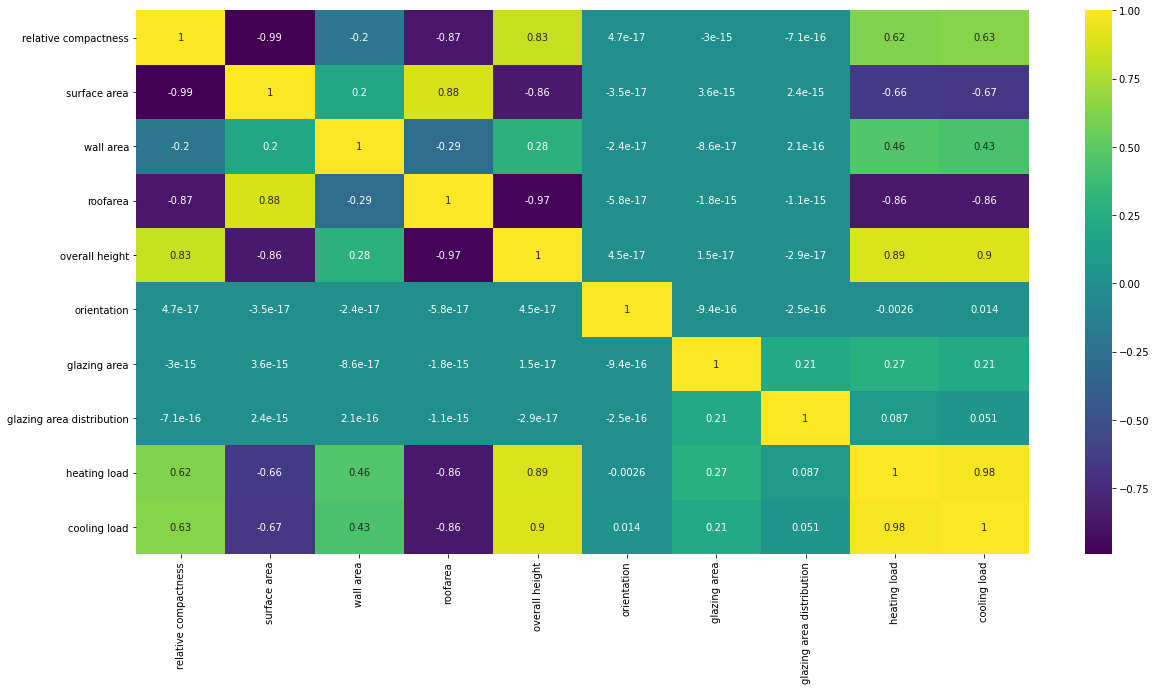

In [51]:
# Finding Correlation among features and target
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

### Keys findouts:
- `relative compactness` is highly negatively correlated with `surface area` and `roofarea`, highly positively correlated with `overall height` and moderately positively correlated with `heating load` and `cooling load`.
- `surface area` is highly negatively correlated with `relative compactness` and `overall height`, highly positively correlated with `roofarea` and moderately negatively correlated with `heating load` and `cooling load`.
- `wall area` is weakly negatively correlated with `relative compactness` and `roofarea`, weakly positively correlated with `surface area` and `overall height` and low positively correlated with `heating load` and `cooling load`.
- `roof area` is highly negatively correlated with `realtive compactness`, `overall height`, `heating load` and `cooling load`, highly positively correlated with `surface area` and weakly correlated with `wall area`.
- `overall height` is highly negatively correlated with `surface area` and `roofarea`, highly positively correlated with `relative compactness`, `heating load` and `cooling load` and weakly correlated to `wall area`.
- `orientation` are not at all correlated with features and target.
- `glazing area` is weakly correlated with `glazing area distribution`, `heating load` and `cooling load`.
- `glazing area distribution` is weakly correlated with `glazing area`.
- `heating load` is highly positively correlated with `overall height` and `cooling load`, highly negatively correlated with `roofarea`, weakly positively correlated with `glazing area`, moderately negatively correlated with `surface area`, moderately positively correlated with `relative compactness` and low correlation with `wall area`.
- `cooling load` is highly positively correlated with `overall height` and `heating load`, highly negatively correlated with `roofarea`, moderately negatively correlated with `surface area`, moderately positively correlated with `relative compactness`, low correlation with `wall area` and weakly correlated with `glazing area`.

## EDA

<AxesSubplot:xlabel='relative compactness', ylabel='surface area'>

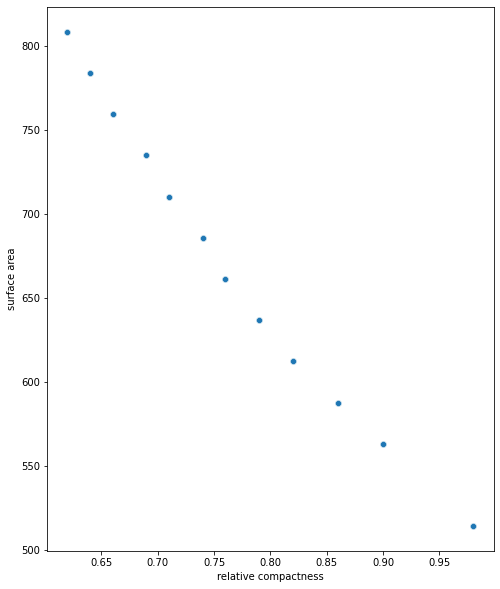

In [87]:
# Let's check scatterplot for 'relative compactness' and 'surface area'
sns.scatterplot(x = df['relative compactness'], y = df['surface area'])

- We can see that there is a huge correlation between them so we can go with one of them to avoid multicollinearity effect.

<AxesSubplot:xlabel='heating load', ylabel='cooling load'>

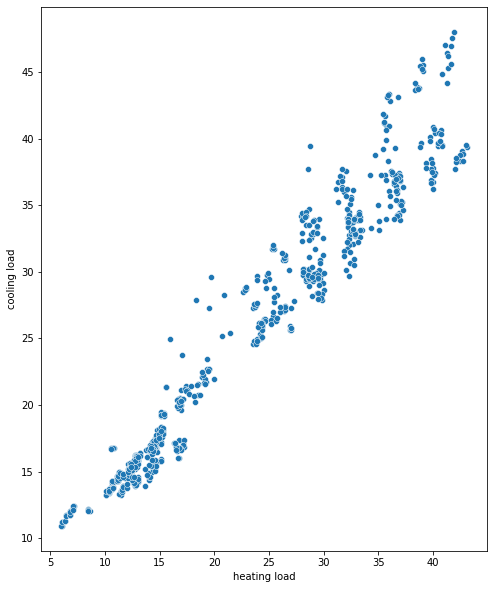

In [88]:
# Let's check scatterplot for 'heating load' and 'cooling load'
sns.scatterplot(x = df['heating load'], y = df['cooling load'])

- We can see that there is a huge correlation between them so we can go with one of them to avoid multicollinearity effect.

<AxesSubplot:xlabel='cooling load', ylabel='overall height'>

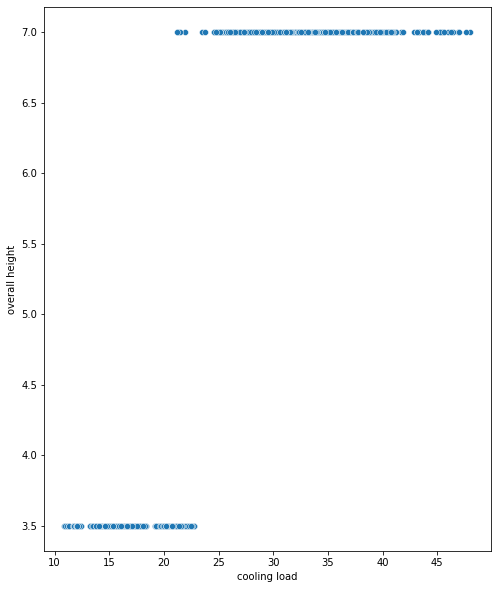

In [89]:
# Let's check scatterplot for 'cooling load' and 'overall height'
sns.scatterplot(x = df['cooling load'], y = df['overall height'])

- We can see that 'overall height has only two values '3.5 and 7.0' and is highly correlated with 'cooling load we can eliminate to remove Multicollinearity.

<AxesSubplot:xlabel='overall height', ylabel='roofarea'>

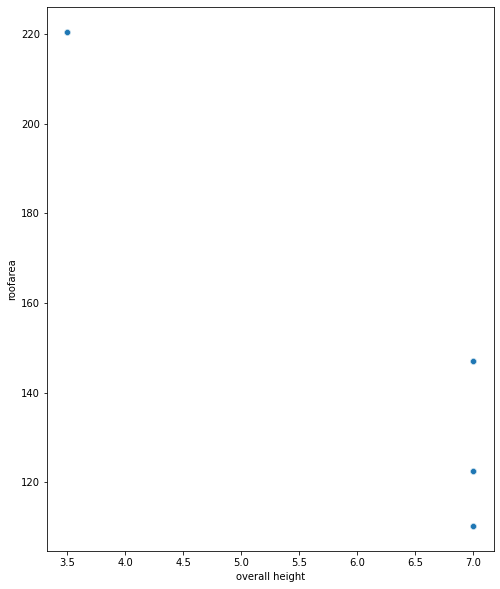

In [97]:
# let's check scatterplot for 'overall height' and 'roofarea'
sns.scatterplot(x = df['overall height'], y = df['roofarea'])

- We can see that they are highly negatively correlated so, we can eliminate one of them to reduce Multicollinearity.

In [109]:
# Let's remove 'relative compactness', 'heating load' and 'overall height' to reduce Multicollinearity.
df1 = df.copy()
df1 = df1.drop(['relative compactness'], axis = 1)
df1

,surface area,wall area,roofarea,overall height,orientation,glazing area,glazing area distribution,heating load,cooling load
0,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...
763,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


## Checking for Multicollinearity using VIF

In [110]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [111]:
# let's check Multicollinearity for cooling load:
X = df1.iloc[:,:-1]
calc_vif(X)

c:\python37\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,surface area,inf
1,wall area,inf
2,roofarea,inf
3,overall height,48.090070
4,orientation,10.710609
5,glazing area,7.021193
6,glazing area distribution,4.515830
7,heating load,59.018971


- We can see that `surface area`, `wall area`, `roofarea`, `relative compactness`, `overallheight`, `orientation`, `heating load` have high Multicollinearity. Need to resolve this as it undermines the statistical significance of an independent variable. `Multicollinearity` reduces the precision of the estimated coefficients, which weakens the statistical power of your regression model.

In [30]:
# let's check Multicollinearity for heating load:
X = df[['relative compactness', 'surface area', 'wall area', 'roofarea',
        'overall height', 'orientation', 'glazing area',
        'glazing area distribution', 'cooling load']]
calc_vif(X)

c:\python37\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,relative compactness,189.569302
1,surface area,inf
2,wall area,inf
3,roofarea,inf
4,overall height,225.695037
5,orientation,10.818570
6,glazing area,5.808618
7,glazing area distribution,4.498201
8,cooling load,66.606619


In [36]:
# Let's drop 'surface area', 'wall area' and 'roofarea' column with high Multicollinearity and see the effect:
X = df.drop(['surface area', 'wall area', 'roofarea'],axis=1)
calc_vif(X)

,variables,VIF
0,relative compactness,80.031260
1,overall height,147.491575
2,orientation,9.969916
3,glazing area,7.398121
4,glazing area distribution,4.501009
5,heating load,174.606148
6,cooling load,174.469225


- Still there is Multicollinearity

In [37]:
# Let's drop `overall height` column with high Multicollinearity and see the effect:
X = df.drop(['overall height'],axis=1)
calc_vif(X)

c:\python37\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,relative compactness,43.252892
1,surface area,inf
2,wall area,inf
3,roofarea,inf
4,orientation,10.871358
5,glazing area,6.569147
6,glazing area distribution,4.589953
7,heating load,179.096537
8,cooling load,179.083793


In [38]:
corr_matrix = df.corr().abs()
high_corr_var=np.where(corr_matrix>0.8)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('relative compactness', 'surface area'),
 ('relative compactness', 'roofarea'),
 ('relative compactness', 'overall height'),
 ('surface area', 'roofarea'),
 ('surface area', 'overall height'),
 ('roofarea', 'overall height'),
 ('roofarea', 'heating load'),
 ('roofarea', 'cooling load'),
 ('overall height', 'heating load'),
 ('overall height', 'cooling load'),
 ('heating load', 'cooling load')]

## Embedded Method of selecting features:

In [112]:
from sklearn.linear_model import LassoCV

X = df1.drop('cooling load', axis =1)
y = df1['cooling load']

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 1.495994
Best score using built-in LassoCV: 0.953509


In [113]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


Lasso picked 4 variables and eliminated the other 4 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

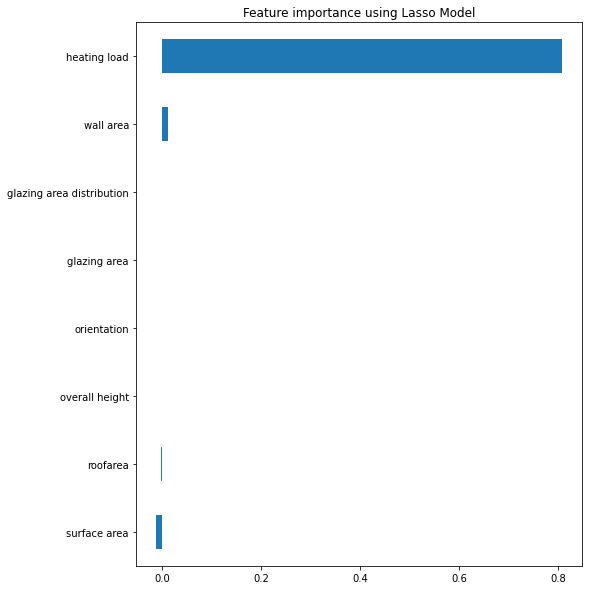

In [114]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

## Wrapper Method for feature selection:
### **Recursive Feature Elimination:**

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True False  True]
[1 1 1 1 1 1 2 1]


c:\python37\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [116]:
#no of features
nof_list=np.arange(1,10)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 8
Score with 8 features: 0.960180


c:\python37\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
c:\python37\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
c:\python37\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
c:\python37\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result 

In [117]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['surface area', 'wall area', 'roofarea', 'overall height',
       'orientation', 'glazing area', 'glazing area distribution',
       'heating load'],
      dtype='object')


c:\python37\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


## Using OLS statsmodel to find multicollinearity and feature selection

In [118]:
import statsmodels.api as sm
import pandas as pd

# defining the variables
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

#Adding constant column of ones, mandatory for sm.OLS model
x = sm.add_constant(x)
#Fitting sm.OLS model
#model = sm.OLS(y,X).fit()
#model.pvalues
  
# adding the constant term
#x = sm.add_constant(x)
  
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
  
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           cooling load   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     2499.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        23:53:20   Log-Likelihood:                -1598.6
No. Observations:                 768   AIC:                             3213.
Df Residuals:                     760   BIC:                             3250.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

- We can see that `surface area` and `roofarea` have high p-values. Let's eliminate these and see the effect on our model.

In [86]:
# Let's drop 'roofarea' and 'surface area' from our model and see the effect:
x = df.drop(['surface area'], axis=1)

#Adding constant column of ones, mandatory for sm.OLS model
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
  
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           cooling load   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.751e+29
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:49:20   Log-Likelihood:                 21335.
No. Observations:                 768   AIC:                        -4.265e+04
Df Residuals:                     758   BIC:                        -4.260e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [13]:
import klib

In [14]:
klib.corr_mat(df)

,relative compactness,surface area,wall area,roofarea,overall height,orientation,glazing area,glazing area distribution,heating load,cooling load
relative compactness,1.00,-0.99,-0.20,-0.87,0.83,0.00,-0.00,-0.00,0.62,0.63
surface area,-0.99,1.00,0.20,0.88,-0.86,-0.00,0.00,0.00,-0.66,-0.67
wall area,-0.20,0.20,1.00,-0.29,0.28,-0.00,-0.00,0.00,0.46,0.43
roofarea,-0.87,0.88,-0.29,1.00,-0.97,-0.00,-0.00,-0.00,-0.86,-0.86
overall height,0.83,-0.86,0.28,-0.97,1.00,0.00,0.00,-0.00,0.89,0.90
orientation,0.00,-0.00,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.01
glazing area,-0.00,0.00,-0.00,-0.00,0.00,-0.00,1.00,0.21,0.27,0.21
glazing area distribution,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.21,1.00,0.09,0.05
heating load,0.62,-0.66,0.46,-0.86,0.89,-0.00,0.27,0.09,1.00,0.98
cooling load,0.63,-0.67,0.43,-0.86,0.90,0.01,0.21,0.05,0.98,1.00


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

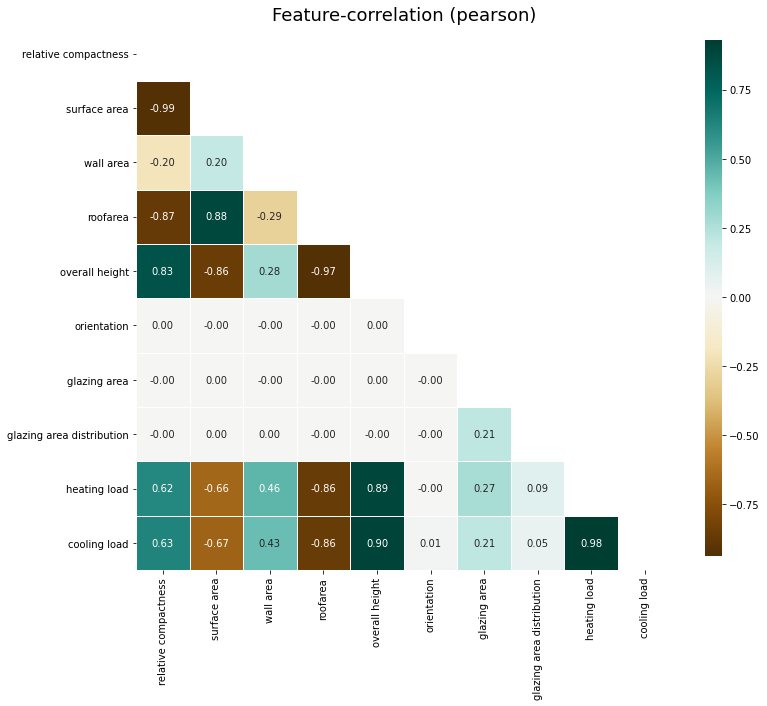

In [15]:
klib.corr_plot(df)

<AxesSubplot:xlabel='cooling load', ylabel='Density'>

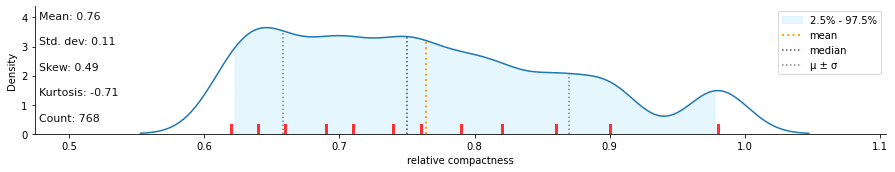

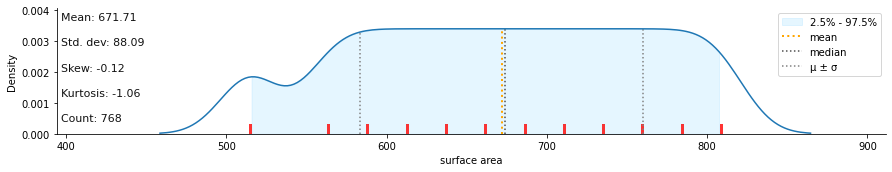

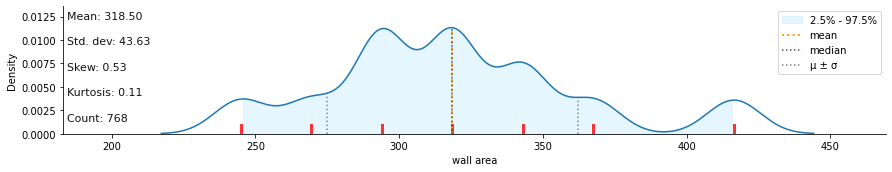

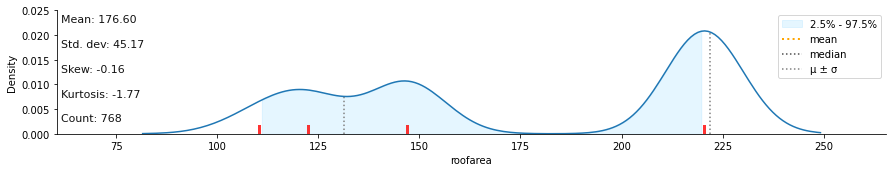

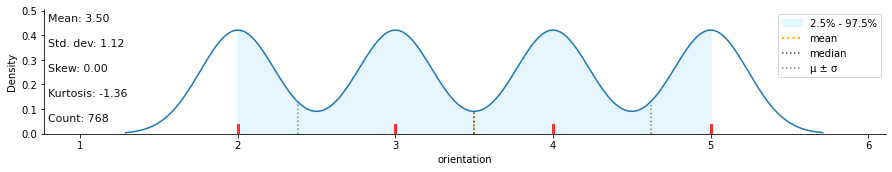

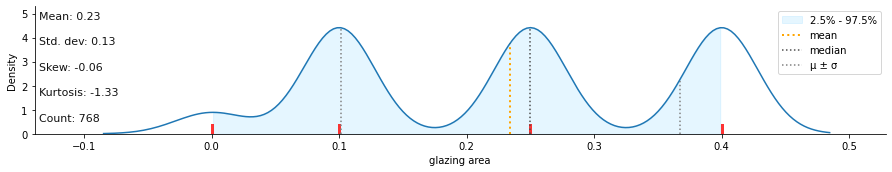

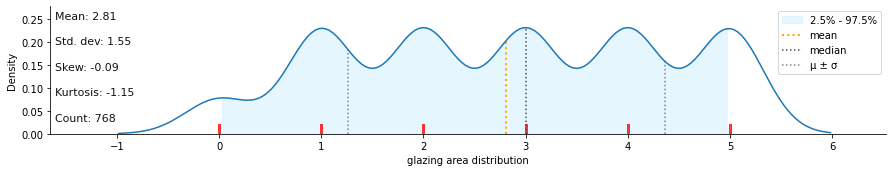

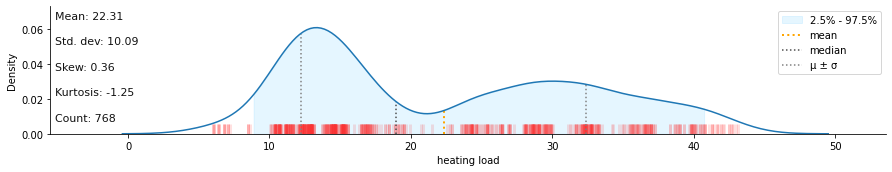

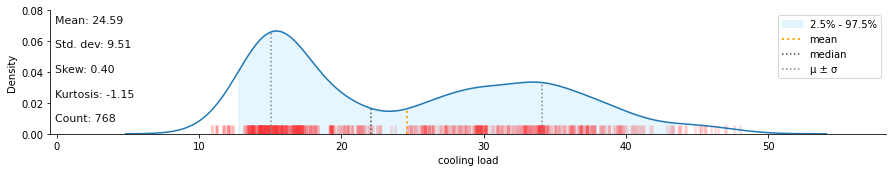

In [16]:
klib.dist_plot(df)

In [17]:
klib.data_cleaning(df)

Shape of cleaned data: (768, 10)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.03 MB (-50.0%)



,relative_compactness,surface_area,wall_area,roofarea,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.550000,21.330000
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.550000,21.330000
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.550000,21.330000
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.550000,21.330000
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.840000,28.280001
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.879999,21.400000
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.540001,16.879999
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.440001,17.110001
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.480000,16.610001


In [18]:
klib.train_dev_test_split(df)

TypeError: train_dev_test_split() missing 1 required positional argument: 'target'